# BEATS commissioning
## Vertical beam positions
Find the vertical zeroes for different items with respect to the beam

______________________________________________________

Author:         Gianluca Iori (gianthk.iori@gmail.com)

Created on:   17/09/2023

Last update:  23/11/2023
______________________________________________________


In [1]:
# import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tifffile
# import scipy as sc
# from scipy import conastants
# import dxchange
# from pandas_ods_reader import read_ods
# import h5py

In [2]:
from DMM.commissioning.tomoalign_simple import image_fit_profile

In [3]:
# plt.style.use('seaborn-v0_8-talk')
# plt.style.use('seaborn-v0_8-notebook')
# plt.style.use('tableau-colorblind10')
# plt.style.use('default')

In [3]:
%matplotlib inline
font = {'weight' : 'bold',
        'size'   : 18}
matplotlib.rc('font', **font)

Settings

In [4]:
work_dir = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/'

# 1. Beam center with respect to detector
Read flat field image with slits open and apply `pseudo-voigt` fit

In [52]:
# im = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/flat_FLIR_2X_slits1_open_test_det+0.5mm.tif')
im = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/flat_FLIR_2X_slits1_open.tif')

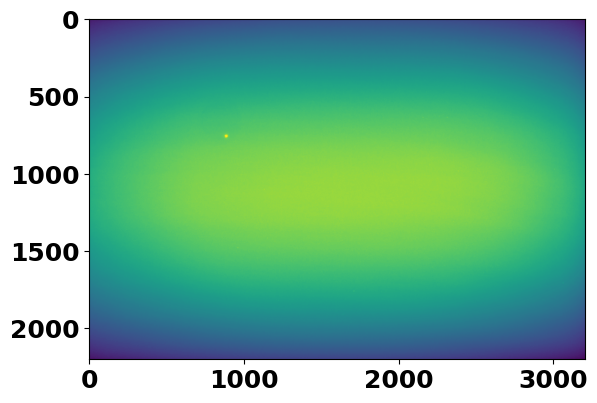

In [53]:
plt.imshow(im)

Let's crop the center of the image to remove a bright spot on the scintillator

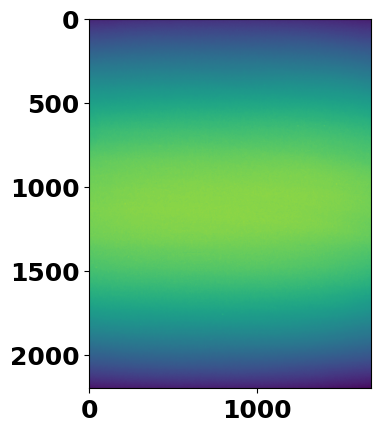

In [54]:
plt.imshow(im[:,920:2600])

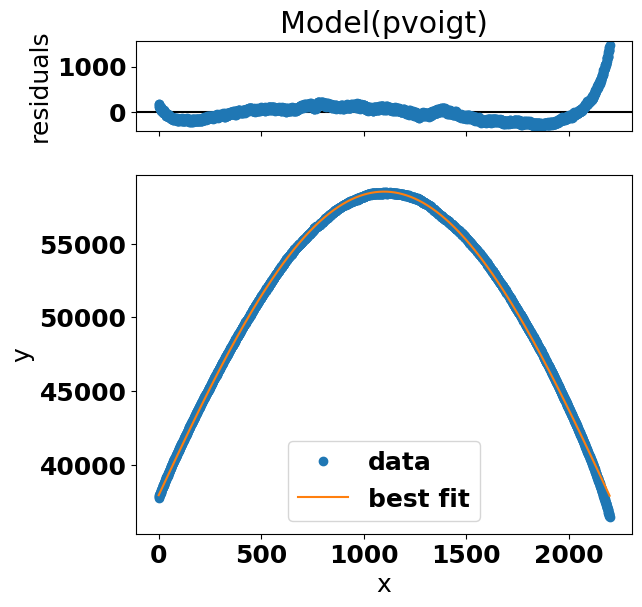

In [43]:
# image_fit_profile(im[:,920:2600], profile='pseudo-voigt', plot=True) # , width=1400
image_fit_profile(im, profile='pseudo-voigt', plot=True) # , width=1400

In [45]:
fit_center = 1099
pixelsize = 4.5/2.1 # [um]
print('pixelsize: {0} [micron]'.format(pixelsize))
print('image center: {0} [pixels]'.format(im.shape[0]/2))
print('fit center: {0} [pixls]'.format(fit_center))

pixelsize: 2.142857142857143 [micron]
image center: 1100.0 [pixels]
fit center: 1099 [pixls]


The detector is centered vertically to the beam..

# 2. Vertical center of Slit_1

In [46]:
# im = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/flat_FLIR_2X_slits1_open_test_det+0.5mm.tif')
im = tifffile.imread('/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/flat_FLIR_2X_slits1_narrow.tif')

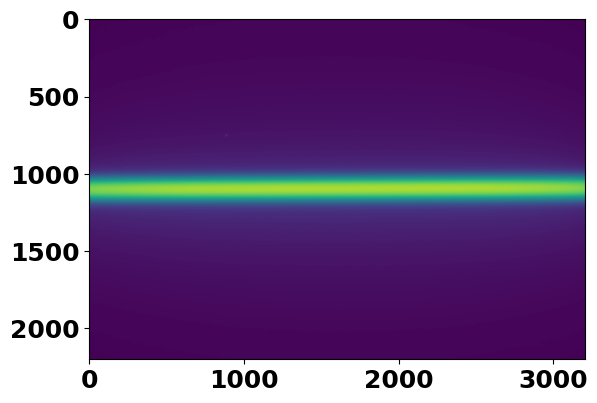

In [47]:
plt.imshow(im)

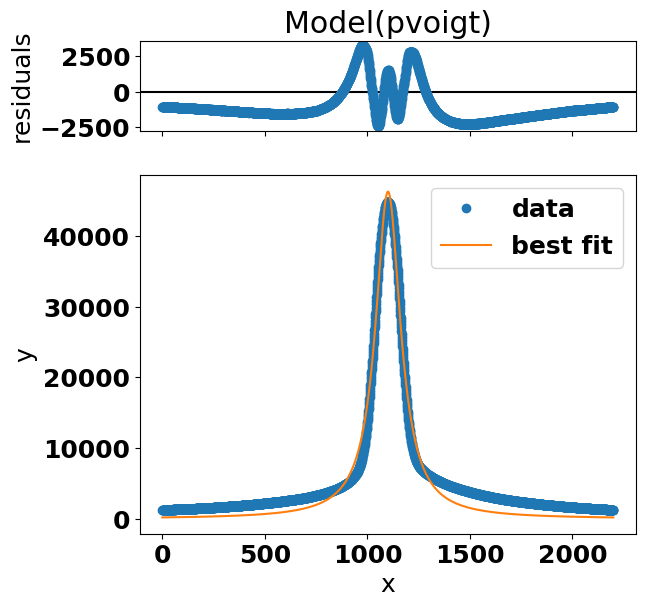

In [49]:
image_fit_profile(im, profile='pseudo-voigt', plot=True) # , width=1400

In [51]:
fit_center = 1100
pixelsize = 4.5/2.1 # [um]
print('pixelsize: {0} [micron]'.format(pixelsize))
print('image center: {0} [pixels]'.format(im.shape[0]/2))
print('fit center: {0} [pixels]'.format(fit_center))

pixelsize: 2.142857142857143 [micron]
image center: 1100.0 [pixels]
fit center: 1100 [pixels]


## New Slits_1 center:
    - Slits1_Y1 = 5.125 mm
    - Slits1_Y2 = 0.174 mm

---
### Slits_1 is completely closed at:
    - Slits1_Y1 = 5.252 mm
    - Slits1_Y2 = 0.126 mm
